Weights (theta): [0.45591018 1.71252465]
Predictions: [2.16843482 3.88095947 5.59348411 7.30600876 9.01853341]


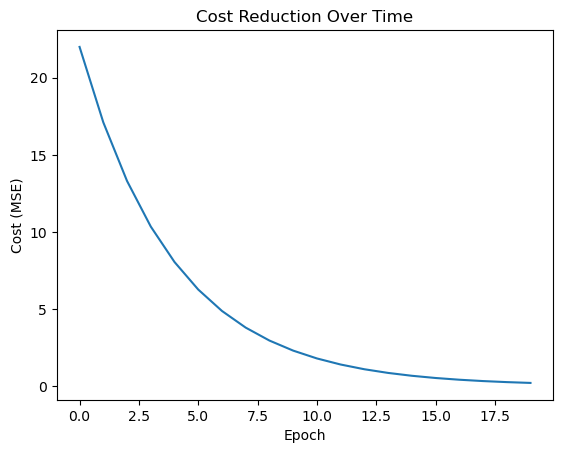

In [1]:
#code to implement linear regression from scratch
import numpy as np
import pandas as pd    # for loading datasets
import matplotlib.pyplot as plt  # for plotting results

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape

        # Add column of ones for bias
        X = np.c_[np.ones((m, 1)), X]

        # Initialize weights
        self.theta = np.zeros(n + 1)

        for _ in range(self.epochs):
            # Predictions
            y_pred = X.dot(self.theta)

            # Gradient
            gradient = (1/m) * X.T.dot(y_pred - y)

            # Update weights
            self.theta -= self.lr * gradient

            # Compute cost (MSE)
            cost = (1/(2*m)) * np.sum((y_pred - y)**2)
            self.cost_history.append(cost)

    def predict(self, X):
        m = X.shape[0]
        X = np.c_[np.ones((m, 1)), X]
        return X.dot(self.theta)


X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = LinearRegressionGD(learning_rate=0.01, epochs=20)
model.fit(X, y)

print("Weights (theta):", model.theta)

predictions = model.predict(X)
print("Predictions:", predictions)

plt.plot(model.cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Time")
plt.show()